# Ejercicio 3

## David Montero Loaiza

### Problema 1

Crea una función como la del ejercicio 2 en la que se pase como input: un vector x con la variable independiente, un parámetro "a", un parámetro "b" y un valor "sigma"; y que devuelva un vector "y" que esté distribuido como una función normal con media = a*x + b y sigma = "sigma".

In [1]:
 
generate_y = function(x,a,b,sigma){
  
  # GAUSSIANA
  y = rnorm(x,x*a + b,sigma)
  
  # RETORNAR VECTOR Y
  return(y)
  
}
 

### Problema 2

Construye una función que reciba dos vectores "x" e "y" supuestamente relacionados linealmente y calcule los valores de "a" y "b" que minimizan la función de coste.

In [2]:
 
# FUNCION PARA GENERAR UNA MATRIZ X SEGUN EL GRADO DEL POLINOMIO
generate_X = function(x,gpoly){
  
  # LA MATRIZ SE INICIA CON 1S
  X = rep(1,length(x))
  
  # SE AGREGAN LOS VALORES DE X ELEVADOS A CADA GRADO
  for(i in 1:gpoly){
    
    # SE ADJUNTAN LOS VALORES A LA MATRIZ
    X = cbind(X,x^i)
    
  }
  
  # SE RETORNA LA MATRIZ
  return(X)
  
}

# VALORES DE ALPHA QUE MINIMIZAN LA FUNCION DE COSTE
loss_min = function(X,y){
  
  # MINIMIZAR LA FUNCION DE COSTE
  a = solve(t(X) %*% X) %*% t(X) %*% y
  
  # RETORNAR ALPHA
  return(a)
  
}
 

### Problema 3

Genera un vector x aleatorio con valores entre 0 y 8 y N = 100 puntos. Usa la función creada en 1 con valores a=1, b=2 y sigma=2, y la función creada en 2 para encontrar el mínimo de la función de coste. Pinta en un mismo plot "x" e "y" representados con puntos, y la recta "a*x + b".

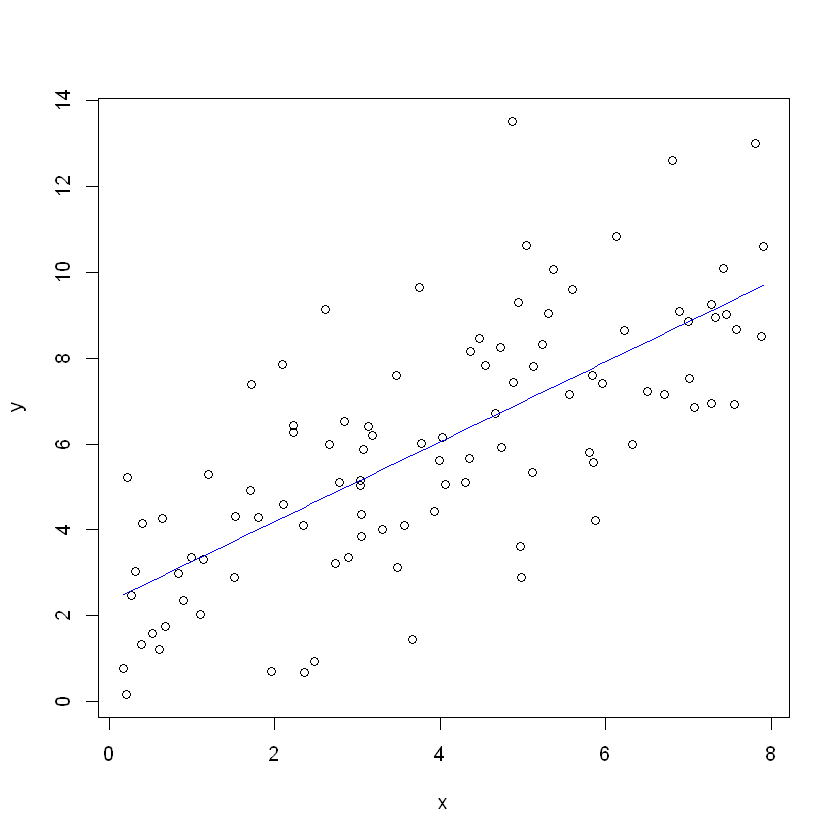

In [3]:
 
# VECTOR ALEATORIO
N = 100
x = runif(N,0,8)

# PARAMETROS ALPHA Y SIGMA
a = 1
b = 2
sigma = 2

# CREAR MATRIZ X
X = generate_X(x,1)

# CREAR VECTOR Y
y = generate_y(x,a,b,sigma)

# OBTENER ALPHA QUE MINIMIZA LA FUNCION DE COSTE
alpha = loss_min(X,y)

# GRAFICA DE REGRESION
plot(x,y)
curve(alpha[1] + alpha[2]*x,add = TRUE,col = "blue")

 

### Problema 4

Construye una función que calcule la matriz de covarianza asociada al ajuste lineal anterior. Utilízala con los vectores "x" e "y" anteriores y calcula dicha matriz para ese caso particular.

In [4]:
 
cov_mat = function(X,y){
  
  # LONGITUD DE Y
  len_y = length(y)
  
  # VARIANZA DE Y
  var_y = var(y)
  
  # COVARIANZA DE Y
  cov_y = diag(var_y,len_y,len_y)
  
  # MATRIZ DE COVARIANZA
  cov_m = (solve(t(X) %*% X) %*% t(X)) %*% cov_y %*% t(solve(t(X) %*% X) %*% t(X))
  
  # RETORNAR MATRIZ DE COVARIANZA
  return(cov_m)
  
}

# CALCULAR MATRIZ DE COVARIANZA
cov_mat_xy = cov_mat(X,y)

cov_mat_xy
 

,X,
X,0.34266126,-0.06603515
,-0.06603515,0.01690312


### Problema 5

Crea una función como la del apartado 1 donde se añadan 3 parámetros más (c, d, e) y en dónde todo sea igual salvo que media = $a + b*x + c*x^2 + d*x^3 + e*x^4$

In [5]:
 
generate_y_v2 = function(x,a,b,c,d,e,sigma){
  
  # GAUSSIANA
  y = rnorm(x,a + b*x + c*x^2 + d*x^3 + e*x^4,sigma)
  
  # RETORNAR VECTOR Y
  return(y)
  
}
 

### Problema 6

Repite 3 y 4 con la función generada en 5 y usando: a = 107, b=-176, c=86, d=-16, e=1.

,X,,,,
X,170.938348,-279.283172,126.37278,-21.3783427,1.21064642
,-279.283172,620.215108,-312.49127,55.8441385,-3.26964102
,126.372776,-312.491267,166.37940,-30.7689377,1.84445017
,-21.378343,55.844138,-30.76894,5.8264365,-0.35544272
,1.210646,-3.269641,1.84445,-0.3554427,0.02198257


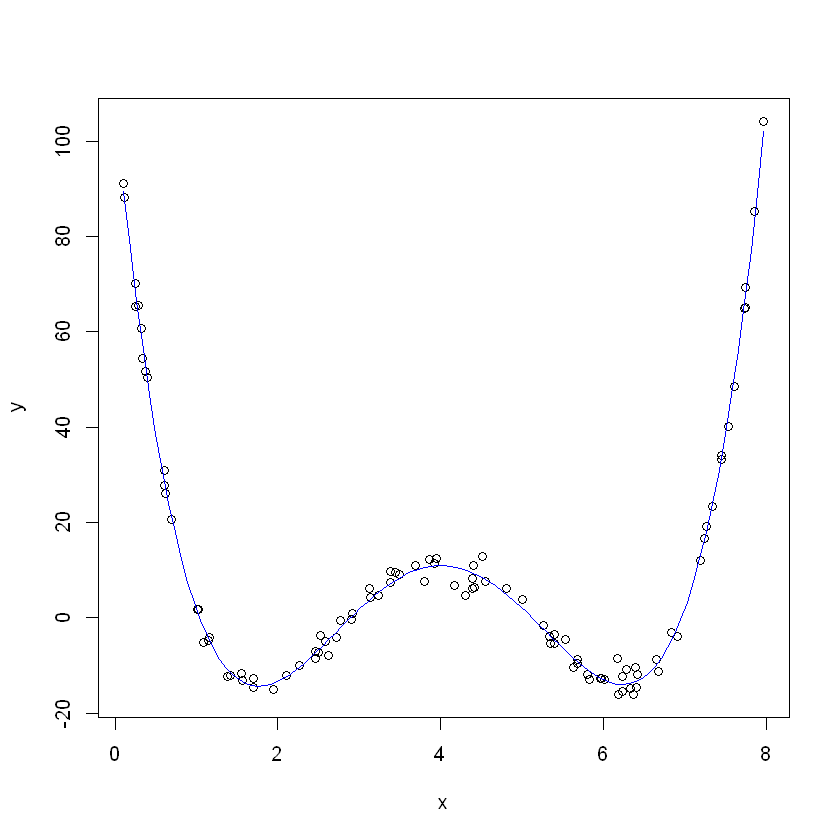

In [6]:
 
# VECTOR ALEATORIO
N = 100
x = runif(N,0,8)

# PARAMETROS ALPHA Y SIGMA
a = 107
b = -176
c = 86
d = -16
e = 1
sigma = 2

# CREAR MATRIZ X
X = generate_X(x,4)

# CREAR VECTOR Y
y = generate_y_v2(x,a,b,c,d,e,sigma)

# OBTENER ALPHA QUE MINIMIZA LA FUNCION DE COSTE
alpha = loss_min(X,y)

# GRAFICA DE REGRESION
plot(x,y)
curve(alpha[1] + alpha[2]*x + alpha[3]*x^2 + alpha[4]*x^3 + alpha[5]*x^4,add = TRUE,col = "blue")

# CALCULAR MATRIZ DE COVARIANZA
cov_mat_xy = cov_mat(X,y)

cov_mat_xy
 